In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.cm as cm
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, make_scorer

In [2]:
#For my first question, I'm not going to rely on ChatGPT to give me a practice problem. I already know what task I want
#to do.
#Problem 1: Produce a correlation matrix for your dataset on homesales showing the correlation between price and other
#variables in the dataset.

In [3]:
#Let's start by loading the CSV file and calculating the correlations:
df = pd.read_csv('C:\\Users\\tejer\\kc_house_data.csv')
correlation_matrix = df.corr()
price_correlation = correlation_matrix['price'].sort_values(ascending=False)
print(price_correlation)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


C:\Users\tejer\AppData\Local\Temp\ipykernel_2780\2926164647.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


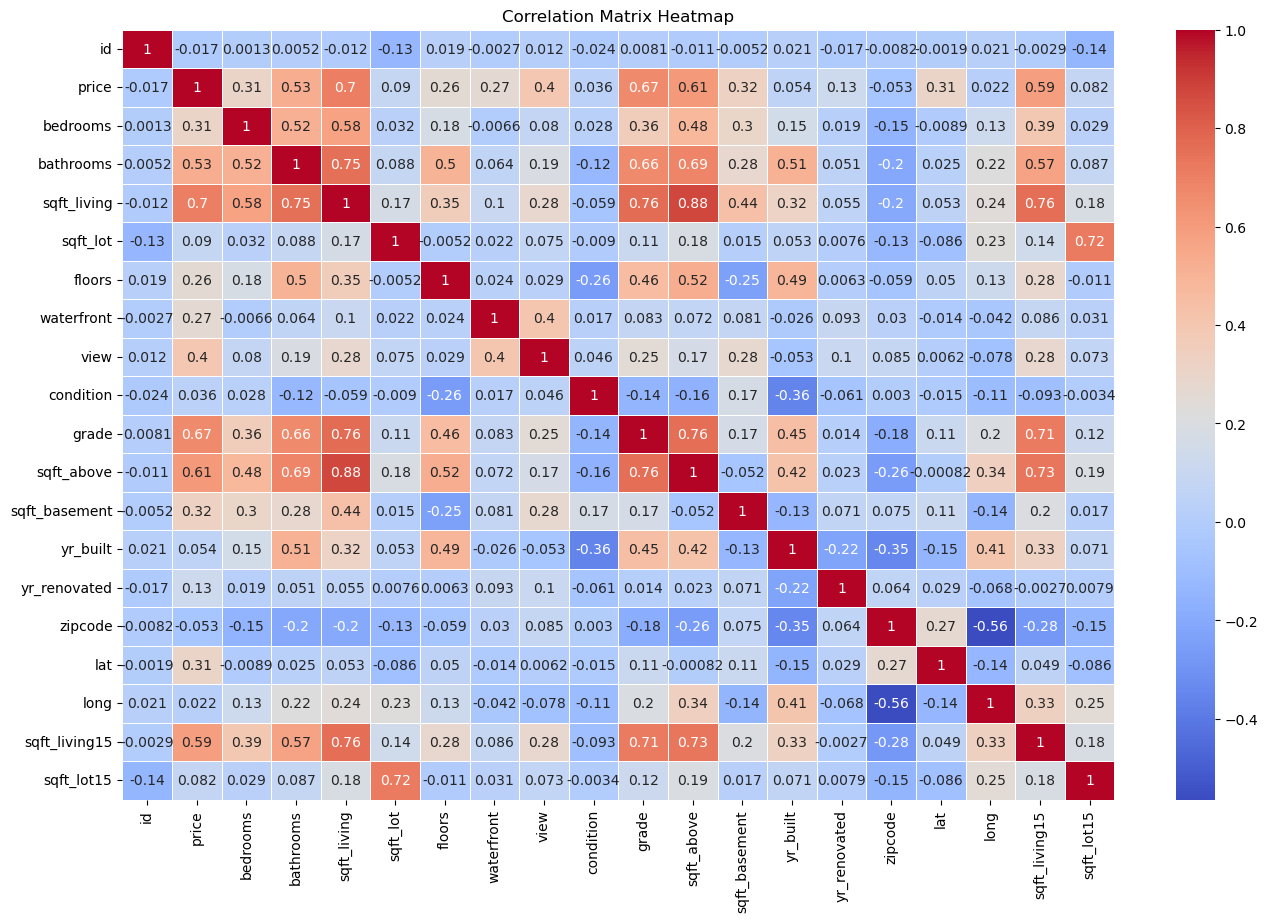

In [4]:
#Now let's generate the graph:
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

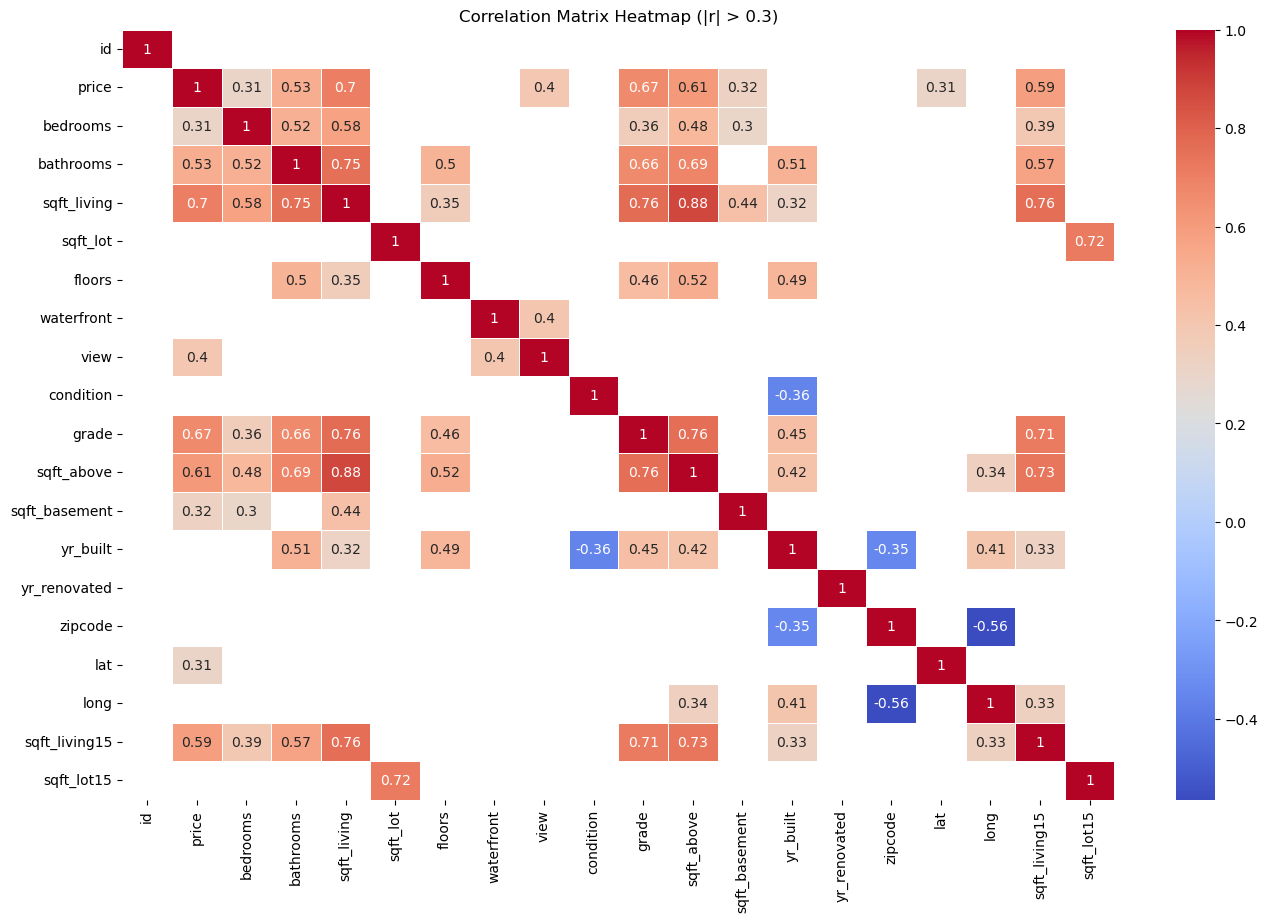

In [5]:
#That's a pretty visualization. But it's a little noisy - there seems to be a lot of data with low correlations.
#I want to hide all the correlations close to zero. So I'm going to mask the observations with an absolute value
#less than 0.3 and reproduce the graph.

threshold = 0.3
mask = (correlation_matrix.abs() < threshold)
plt.figure(figsize=(16, 10))

#Use the mask argument to hide in the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, mask=mask)
plt.title('Correlation Matrix Heatmap (|r| > 0.3)')
plt.show()

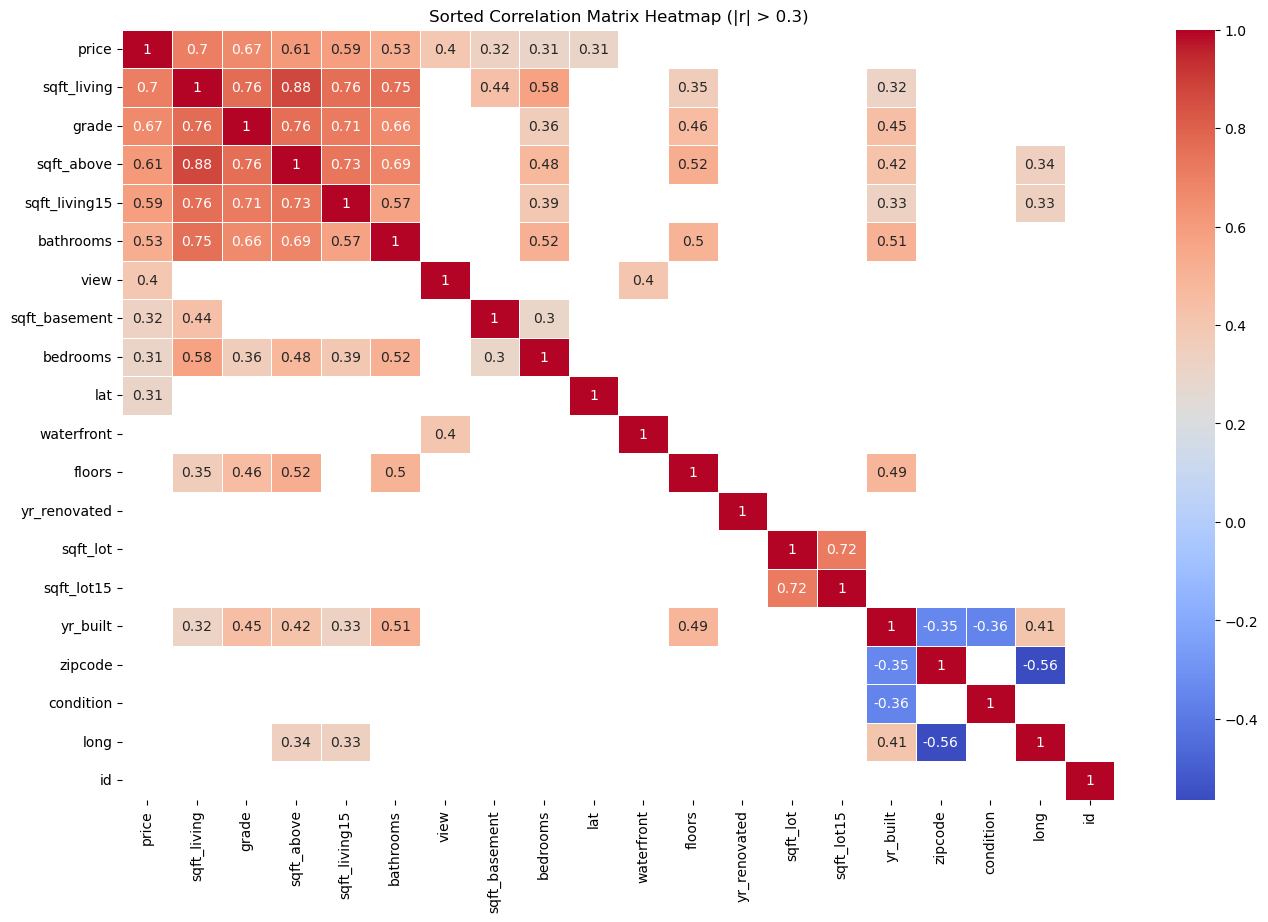

In [6]:
#That's... somewhat clearer. My eyes are jumping around though, it's hard to find a clear trend. I'm going to sort
#based on correlation so the chart presents the most relevant correlations with price.

#Sort columns by correlation with price
sorted_columns = correlation_matrix.abs().sort_values(by='price', ascending=False).index.tolist()
#Reorder the correlation matrix using the sorted column order
sorted_corr_matrix = correlation_matrix[sorted_columns].reindex(sorted_columns)
#Update mask for new matrix
threshold = 0.3
mask = (sorted_corr_matrix.abs() < threshold)
#Reproduce the graph
plt.figure(figsize=(16, 10))
sns.heatmap(sorted_corr_matrix, annot=True, cmap='coolwarm', linewidths=.5, mask=mask)
plt.title('Sorted Correlation Matrix Heatmap (|r| > 0.3)')
plt.show()

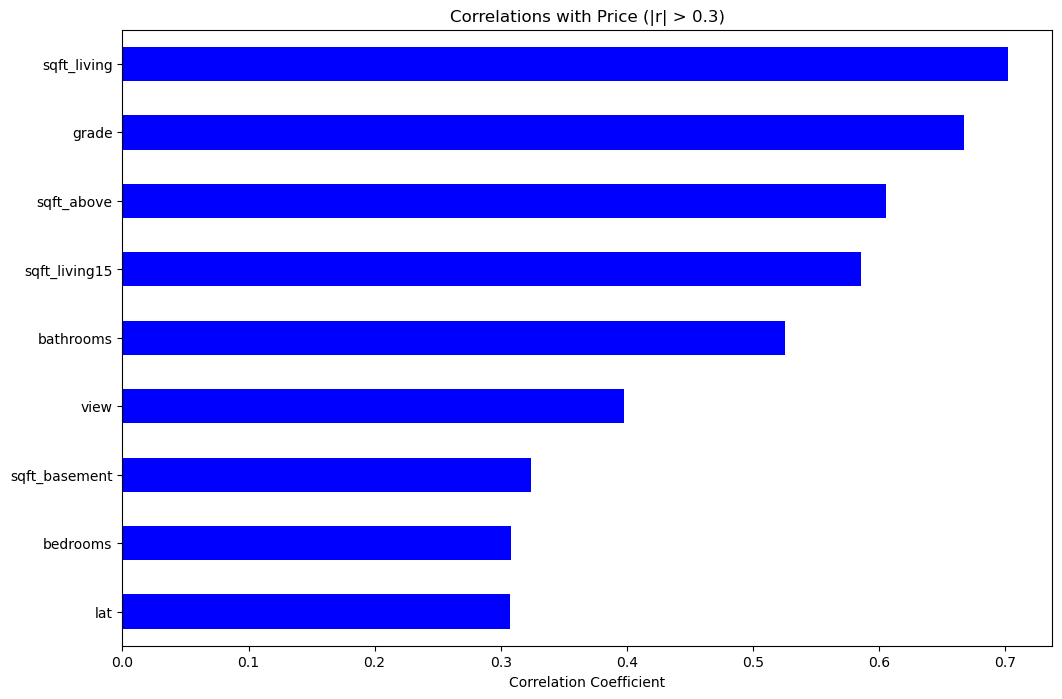

In [7]:
#That's somewhat better, the chart is more organized. But I don't like the symmetry and empty space. I think a bar
#chart showing the correlations might be better.

correlations_with_price = sorted_corr_matrix['price'].drop('price')
filtered_correlations = correlations_with_price[correlations_with_price.abs() > threshold]
plt.figure(figsize=(12, 8))
filtered_correlations.sort_values().plot(kind='barh', color='blue')  # 'barh' creates a horizontal bar plot
plt.title('Correlations with Price (|r| > 0.3)')
plt.xlabel('Correlation Coefficient')
plt.show()

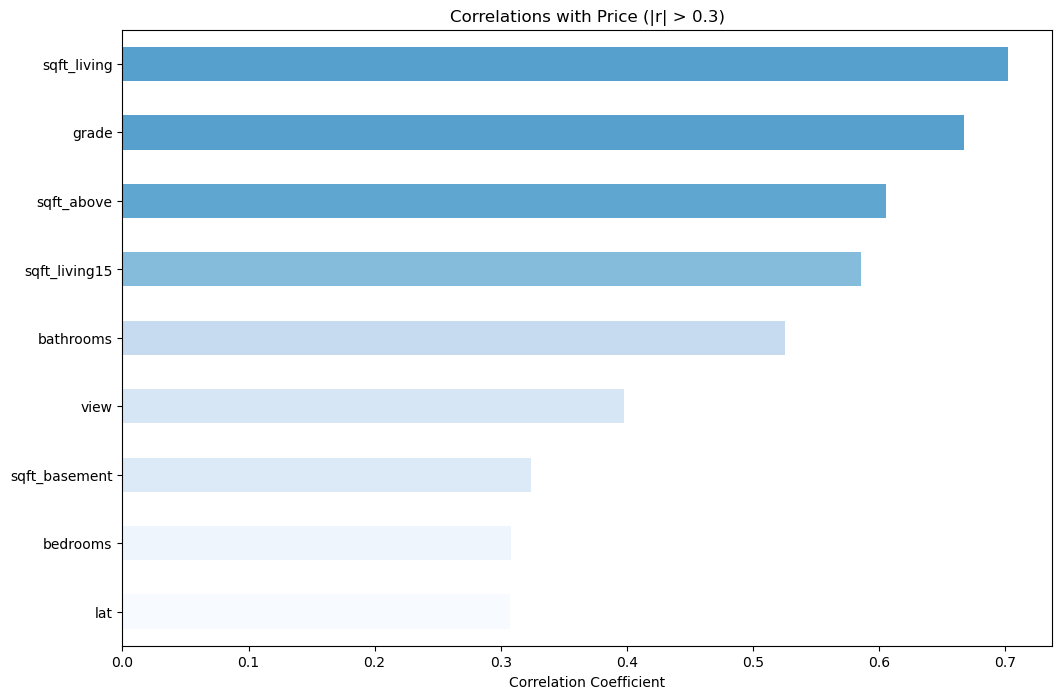

In [8]:
#Almost there. Let's shade the bars.
#Normalize the correlation values to be between 0 and 1
norm = cm.colors.Normalize(vmin=0, vmax=filtered_correlations.abs().max())
colormap = cm.Blues_r  #Use the Blues colormap
colors = [colormap(norm(np.abs(value))) for value in filtered_correlations]
plt.figure(figsize=(12, 8))
filtered_correlations.sort_values().plot(kind='barh', color=colors)
plt.title('Correlations with Price (|r| > 0.3)')
plt.xlabel('Correlation Coefficient')
plt.show()

In [9]:
#I like the look of that. Let's try some other plots.
#Similar to the last question, I have a good idea of what kind of chart I want to produce so I'm just going to write
#the question myself.
#Problem 2: Produce a scatter plot with square foot, living on the X axis and price on Y axis.
#Scale the dots based on the number of bathrooms.
#Color code based on grade.
#Add a trendline.


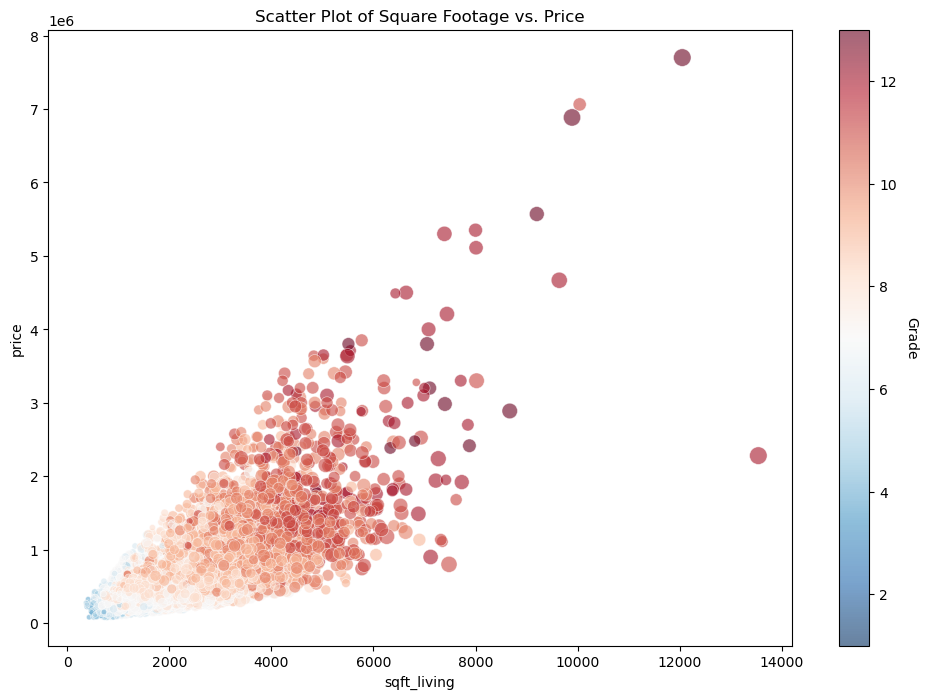

In [10]:
#Let's start be defining the variables we'll use to graph with.
x_data = df['sqft_living']
y_data = df['price']
size_data = df['bathrooms']
color_data = df['grade']

#Now let's normalize the grade values for color mapping
norm_color = cm.colors.Normalize(vmin=color_data.min(), vmax=color_data.max())
colormap = cm.RdBu_r

#And normalize the bathrooms values for size scaling
size_scale = 20  # This is an arbitrary scaling factor to adjust the size of the dots
norm_size = cm.colors.Normalize(vmin=size_data.min(), vmax=size_data.max())

#Produce the graph:

plt.figure(figsize=(12, 8))

plt.scatter(x_data, y_data, 
            c=color_data, cmap=colormap, norm=norm_color,  #Color based on 'grade'
            s=size_data * size_scale, alpha=0.6,          #Size based on 'bathrooms'
            edgecolors="w", linewidth=0.5)                #Add a thin white edge for clarity

cbar = plt.colorbar()
cbar.set_label('Grade', rotation=270, labelpad=15) #Rotate for better visibility

plt.title('Scatter Plot of Square Footage vs. Price')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()


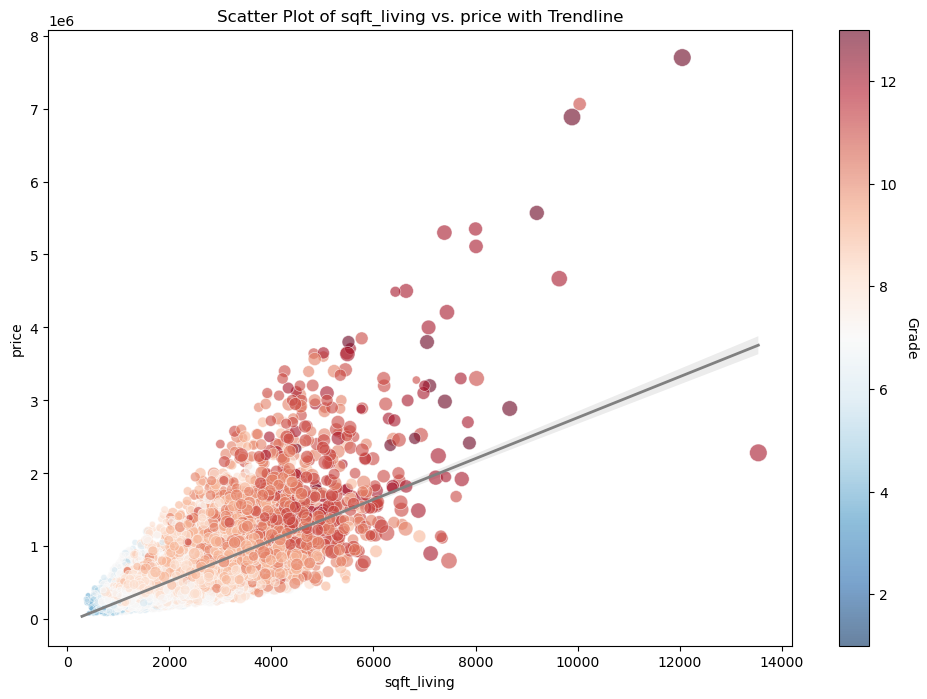

In [11]:
#That looks pretty good. I can generally see the relationship between square footage and price.
#The dots are too big though. I want to shrink them so the variation is clearer.
#I also want to add a trendline.

#Shrink the dots from 50 to 20
size_scale = 20  # Reduced from 100 for smaller dots

#Set plot size
plt.figure(figsize=(12, 8))

#Plotting the trendline
sns.regplot(x=x_data, y=y_data, scatter=False, color='gray', line_kws={'linewidth':2})

#Layering the scatter plot with color and size encoding
plt.scatter(x_data, y_data, 
            c=color_data, cmap=colormap, norm=norm_color,  #Color based on 'grade'
            s=size_data * size_scale, alpha=0.6,          #Size based on 'bathrooms'
            edgecolors="w", linewidth=0.5)                #Add a thin white edge for clarity

cbar = plt.colorbar()
cbar.set_label('Grade', rotation=270, labelpad=15)

plt.title('Scatter Plot of sqft_living vs. price with Trendline')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

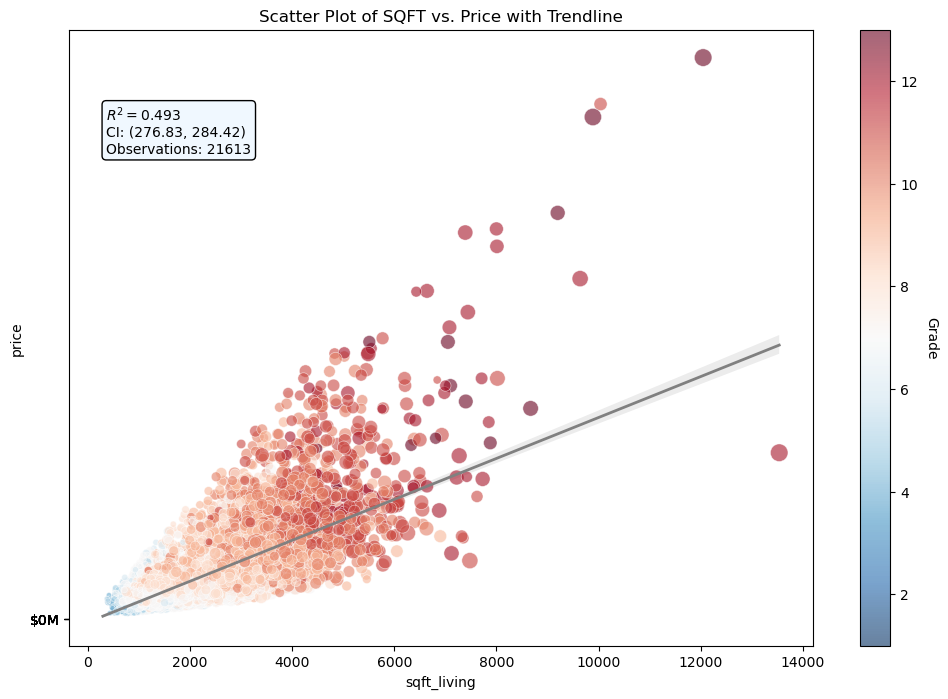

In [12]:
#That looks good too. I'd love to adjust the units on the Y-axis and add a callout box for some summary stats
#on the trendline.
#ChatGPT recommended I use the statsmodel.api to run the trendline.

#Set chart size
plt.figure(figsize=(12, 8))

#Adjust the Y-axis to display in terms of millions of dollars
plt.yticks(ticks=plt.yticks()[0], labels=['${:.0f}M'.format(tick/1e6) for tick in plt.yticks()[0]])

#Compute the linear regression using statsmodels
X = sm.add_constant(x_data)  #Adds constant to the model (intercept)
model = sm.OLS(y_data, X)
results = model.fit()

#Plot the trendline
sns.regplot(x=x_data, y=y_data, scatter=False, color='gray', line_kws={'linewidth':2})

#Scatter plot with color and size encoding
plt.scatter(x_data, y_data, 
            c=color_data, cmap=colormap, norm=norm_color, 
            s=size_data * size_scale, alpha=0.6, 
            edgecolors="w", linewidth=0.5)

cbar = plt.colorbar()
cbar.set_label('Grade', rotation=270, labelpad=15)

plt.title('Scatter Plot of SQFT vs. Price with Trendline')
plt.xlabel('sqft_living')
plt.ylabel('price')

#Display summary statistics in a text box inside the plot
summary_text = (
    f"$R^2 = {results.rsquared:.3f}$\n"
    f"CI: ({results.conf_int().iloc[1, 0]:.2f}, {results.conf_int().iloc[1, 1]:.2f})\n"
    f"Observations: {len(x_data)}"
)
plt.annotate(summary_text, xy=(0.05, 0.8), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="aliceblue"))

plt.show()

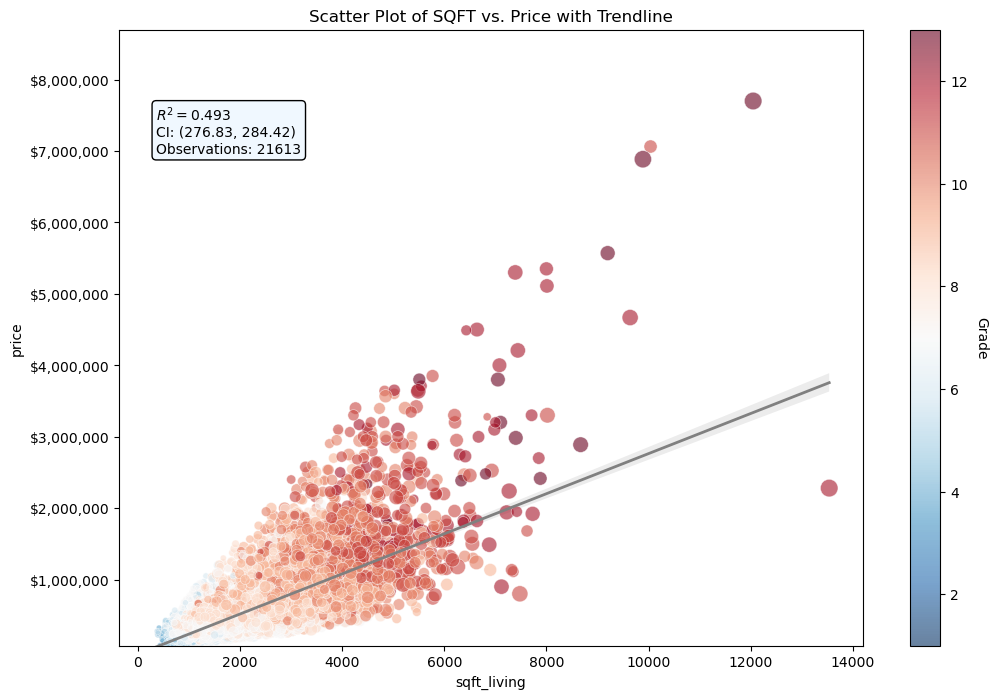

In [13]:
#Let's fix the Y-Axis.

plt.figure(figsize=(12, 8))

#Plotting the trendline
sns.regplot(x=x_data, y=y_data, scatter=False, color='gray', line_kws={'linewidth':2})

#Scatter plot with color and size encoding
plt.scatter(x_data, y_data, 
            c=color_data, cmap=colormap, norm=norm_color,  
            s=size_data * size_scale, alpha=0.6, 
            edgecolors="w", linewidth=0.5)

#Format the Y-axis tick labels
y_ticks = plt.yticks()[0]
plt.yticks(ticks=y_ticks, labels=['${:,.0f}'.format(tick) for tick in y_ticks])

#Adjust the Y-axis limits
min_price = y_data.min()
max_price = y_data.max() + 1000000 #Giving some headroom
plt.ylim([min_price, max_price])

cbar = plt.colorbar()
cbar.set_label('Grade', rotation=270, labelpad=15)

plt.title('Scatter Plot of SQFT vs. Price with Trendline')
plt.xlabel('sqft_living')
plt.ylabel('price')

plt.annotate(summary_text, xy=(0.05, 0.8), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="aliceblue"))

plt.show()

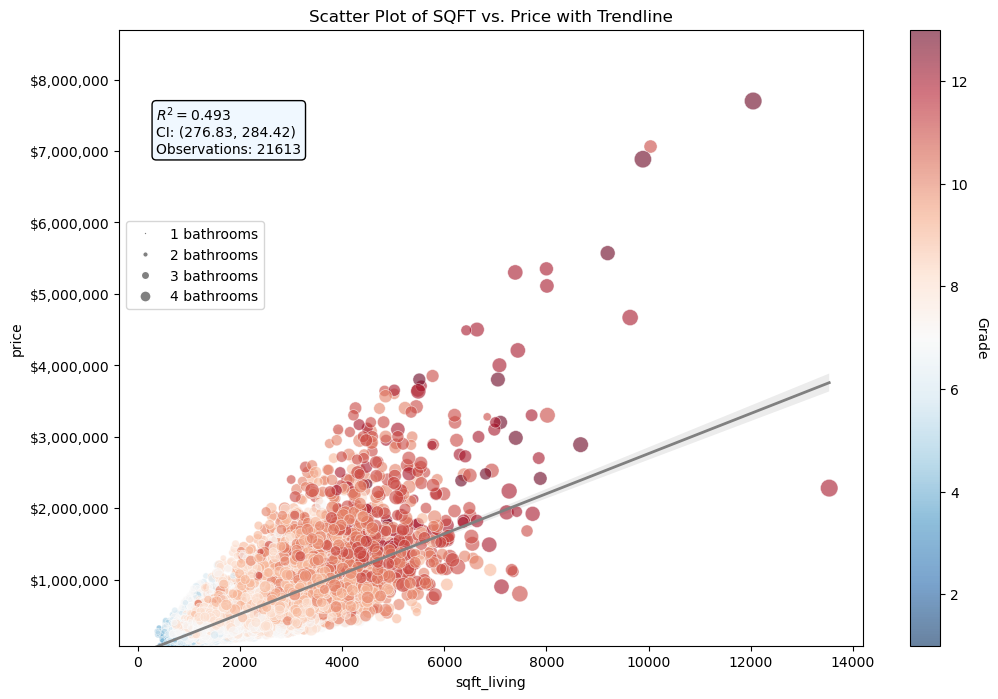

In [32]:
#Looking good. Let's add a legend for the size of the dots to close it out.

#Define sizes and labels
sizes = [1, 2, 3, 4]
labels = [f"{s} bathrooms" for s in sizes]
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=(s)*size_scale/10, label=label) for s, label in zip(sizes, labels)]

plt.figure(figsize=(12, 8))

#Re-run the code to produce the chart
#Plot the trendline
sns.regplot(x=x_data, y=y_data, scatter=False, color='gray', line_kws={'linewidth':2})

#Scatter plot with color and size encoding
scatter = plt.scatter(x_data, y_data, 
                      c=color_data, cmap=colormap, norm=norm_color,  
                      s=size_data * size_scale, alpha=0.6, 
                      edgecolors="w", linewidth=0.5)

#Format the Y-axis tick labels
y_ticks = plt.yticks()[0]
plt.yticks(ticks=y_ticks, labels=['${:,.0f}'.format(tick) for tick in y_ticks])

#Adjust the Y-axis limits
plt.ylim([min_price, max_price])

#Colorbar for the 'grade' variable
cbar = plt.colorbar(scatter)
cbar.set_label('Grade', rotation=270, labelpad=15)

#Now let's produce the legend for the size of the dots
plt.legend(handles=handles, loc='upper left', bbox_to_anchor=(0, 0.7))

#And finalize the plot
plt.title('Scatter Plot of SQFT vs. Price with Trendline')
plt.xlabel('sqft_living')
plt.ylabel('price')

plt.annotate(summary_text, xy=(0.05, 0.8), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="aliceblue"))

plt.show()


In [14]:
#Great chart. Let's move on.

In [15]:
#Let's use the King County homesales data to do some predictive, machine learning analysis. I've asked ChatGPT to break
#this process up into segments.
#Problem 1: Handling Missing Data: Inspect the dataset for any missing values. 
#Depending on the nature and extent of the missing data, decide whether to impute them, remove rows or columns, 
#or use another method.

#Let's see if there are any missing values in our dataset
missing_values = df.isna().sum()
print(missing_values)
#And what percentage of the total values are missing
missing_percentage = (df.isna().sum() / len(df)) * 100
print(missing_percentage)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64


In [16]:
#Great, all of our data is still there.
#Problem 2: Categorical Encoding: While most of the variables seem numerical, there could be a need to handle the categorical ones, 
#especially if they are represented as strings. For example, you might need to convert the 'waterfront' column into binary 
#(0 or 1) if it isn't already.

#Let's look at the categories of variables:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [17]:
#Looks like most of my data is either an int or a float, except for the date. But I know some of the int values are
#categorical because they have a small number of unique values.

#Let's take a look
for col in df.columns:
    unique_vals = df[col].nunique()
    if unique_vals < 33:  #I'm choosing 33 because based on prior assignments I know one house had 33 bedrooms
        print(f"{col} has {unique_vals} unique values: {df[col].unique()}")

bedrooms has 13 unique values: [ 3  2  4  5  1  6  7  0  8  9 11 10 33]
bathrooms has 30 unique values: [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]
floors has 6 unique values: [1.  2.  1.5 3.  2.5 3.5]
waterfront has 2 unique values: [0 1]
view has 5 unique values: [0 3 4 2 1]
condition has 5 unique values: [3 5 4 1 2]
grade has 12 unique values: [ 7  6  8 11  9  5 10 12  4  3 13  1]


In [19]:
#Hmm. I hestiate to call any of these categorical, other than maybe waterfront which I think is better handled as 
#a binary variable.
#Let's at least convert the date variable to datetime, then create day/weekday/month/year variables to improve later predictions.

#Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

#From date, create year, month, day, and weekday columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday

#Drop the original 'date' column from df
df = df.drop(columns=['date'])

#Now, split the data into training and testing sets
X = df.drop('waterfront', axis=1)
y = df['waterfront']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [20]:
#Problem 3: Feature Scaling: KNN is sensitive to varying scales between features. Ensure that all numerical features like 
#'sqft_living', 'sqft_lot', and others have a similar scale. 
#Use methods like min-max scaling or standardization (z-score normalization).
#Also, convert the date column to a more usable format.

#Before I scale, I want to split my data into the test and training for later version control.

#Separate the features and target variable
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#Now we can scale our data using the Z-score normalization

#Select numerical columns to scale from training data
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()

#Fit the scaler on the training data. Transform both training and test data
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [21]:
#Problem 4: Model Evaluation: Compute error metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and 
#R^2 score for your KNN model. Plot the actual vs. predicted home prices.

#Set K to 5 to start
k = 5
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)

#Look at some basic performance statistics, such as
#MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

#R squared
r2 = knn_regressor.score(X_test, y_test)
print(f"R-squared: {r2}")

#Mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 43597777760.3507
R-squared: 0.747407111961751
Mean Absolute Error: 104995.82438121673


In [22]:
#Looks like we have an R-squared of 75%. Which isn't bad. Our model can explain 75% of the variance in price based on our
#inputs. Let's experiment with our K values.

#Convert our prior block of code to a function
def eval_knn(X_train, y_train, X_test, y_test, k):
    #Train KNN regressor
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    
    #Calculate and print metrics
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error (k={k}): {mse}")
    
    r2 = knn_regressor.score(X_test, y_test)
    print(f"R-squared (k={k}): {r2}")
    
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error (k={k}): {mae}")
    print("-------------------------------")

#Repeat for several values of K
for k in [1, 3, 5, 10, 20]:
    eval_knn(X_train, y_train, X_test, y_test, k)

Mean Squared Error (k=1): 56519637951.554016
R-squared (k=1): 0.6725415992637417
Mean Absolute Error (k=1): 129883.51839000694
-------------------------------
Mean Squared Error (k=3): 43521159756.569916
R-squared (k=3): 0.747851014468826
Mean Absolute Error (k=3): 108645.55987354461
-------------------------------
Mean Squared Error (k=5): 43597777760.3507
R-squared (k=5): 0.747407111961751
Mean Absolute Error (k=5): 104995.82438121673
-------------------------------
Mean Squared Error (k=10): 43818330680.018105
R-squared (k=10): 0.7461292922698786
Mean Absolute Error (k=10): 103333.69687716864
-------------------------------
Mean Squared Error (k=20): 47649877962.98043
R-squared (k=20): 0.7239304178414958
Mean Absolute Error (k=20): 104405.26241036317
-------------------------------


In [23]:
#Looks like the sweet spot might be between 3 and 10. Let's run again with all the values between.
for k in [3, 4, 5, 6, 7, 8, 9, 10]:
    eval_knn(X_train, y_train, X_test, y_test, k)

Mean Squared Error (k=3): 43521159756.569916
R-squared (k=3): 0.747851014468826
Mean Absolute Error (k=3): 108645.55987354461
-------------------------------
Mean Squared Error (k=4): 42466600333.87316
R-squared (k=4): 0.7539608261122343
Mean Absolute Error (k=4): 106628.49358084664
-------------------------------
Mean Squared Error (k=5): 43597777760.3507
R-squared (k=5): 0.747407111961751
Mean Absolute Error (k=5): 104995.82438121673
-------------------------------
Mean Squared Error (k=6): 42777922581.35186
R-squared (k=6): 0.7521571152434496
Mean Absolute Error (k=6): 104025.23247744622
-------------------------------
Mean Squared Error (k=7): 42815702673.448875
R-squared (k=7): 0.7519382283399567
Mean Absolute Error (k=7): 103576.34589075048
-------------------------------
Mean Squared Error (k=8): 43838570876.79819
R-squared (k=8): 0.7460120264361187
Mean Absolute Error (k=8): 103227.84868725423
-------------------------------
Mean Squared Error (k=9): 43661602409.73585
R-squared

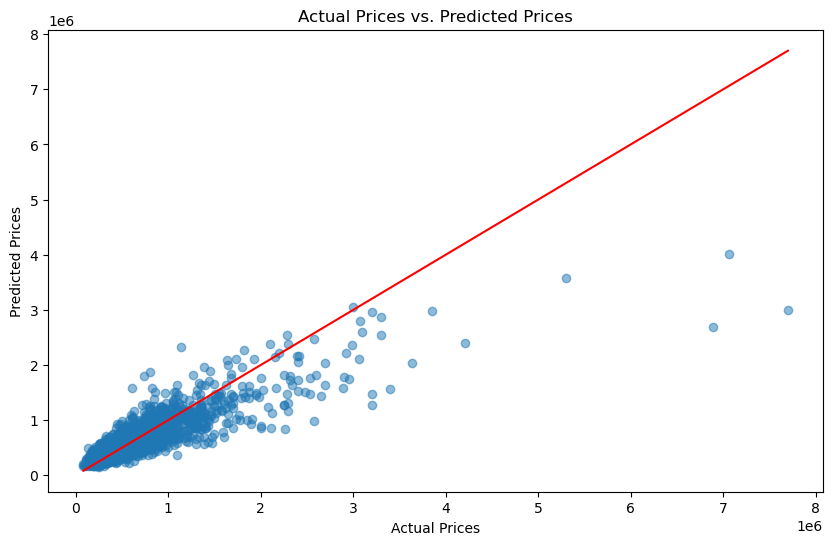

In [24]:
#K=4 seems to have the best results. Now let's plot our results with K=4.


#Predictions using K=4
y_pred = knn_regressor.predict(X_test)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') #Line of perfect prediction
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

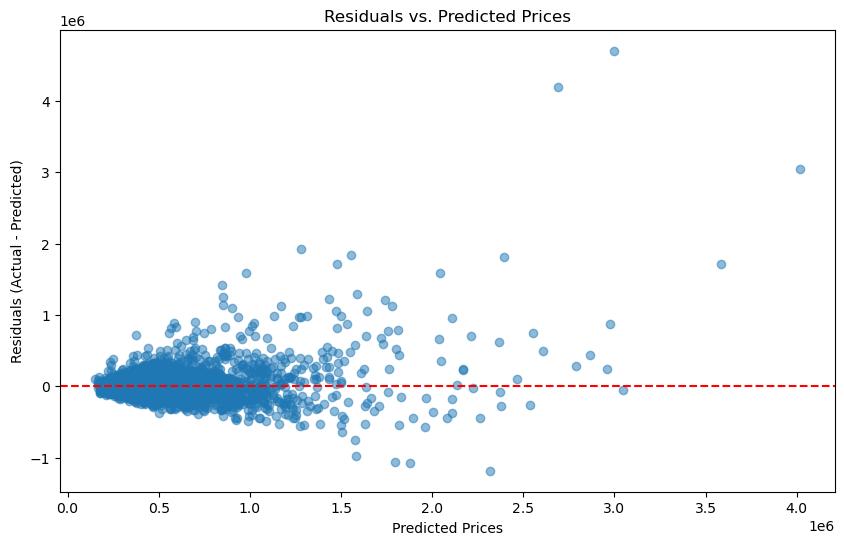

In [25]:
#Hmm. That shows some of the errors, but not in a very intuitive way. I want to plot the residuals.

#Calculate residuals
residuals = y_test - y_pred

#Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  #Reference line for zero error
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs. Predicted Prices')
plt.show()

In [26]:
#Seems generally balanced, though may some exponential curvature to the predictions might fit here as the errors get very
#positively large at high predicted prices.

In [27]:
#Problem 6: Advanced Machine Learning Tasks:
#Implement a different regression model (e.g., linear regression) and compare its performance against KNN.
#If your dataset is large enough, consider using techniques like cross-validation for more robust performance evaluation.

In [28]:
#Given I know that square foot living has the highest correlation with price, let's use that as our linear regression
#predictive variable.


#Run simple regression
X_train_simple = X_train[['sqft_living']]
X_test_simple = X_test[['sqft_living']]
linear_reg = LinearRegression()
linear_reg.fit(X_train_simple, y_train)

#Produce prediction
y_pred_linear = linear_reg.predict(X_test_simple)

#Show results

mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"MSE for Simple Linear Regression: {mse_linear}")
r2_linear = linear_reg.score(X_test_simple, y_test)
print(f"R-squared for Simple Linear Regression: {r2_linear}")
mae_linear = mean_absolute_error(y_test, y_pred_linear)
print(f"MAE for Simple Linear Regression: {mae_linear}")

MSE for Simple Linear Regression: 85730574276.16481
R-squared for Simple Linear Regression: 0.5033019006466926
MAE for Simple Linear Regression: 178578.01159005205


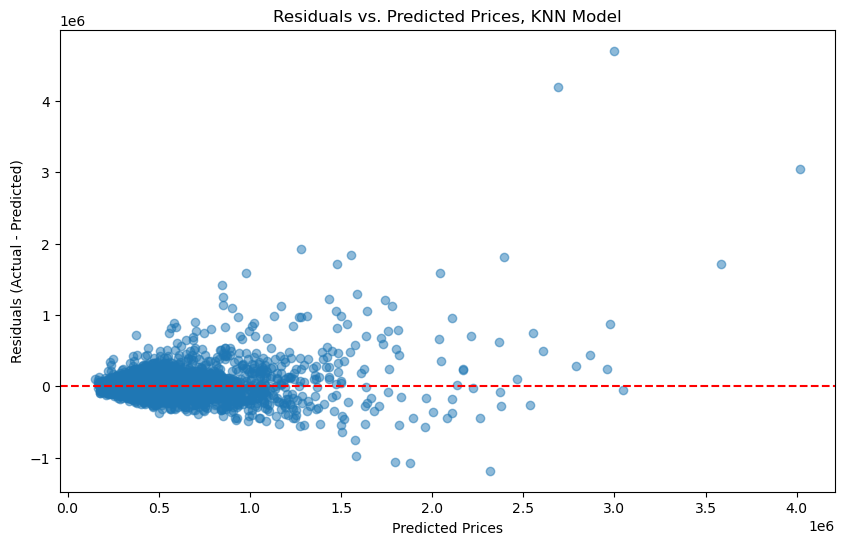

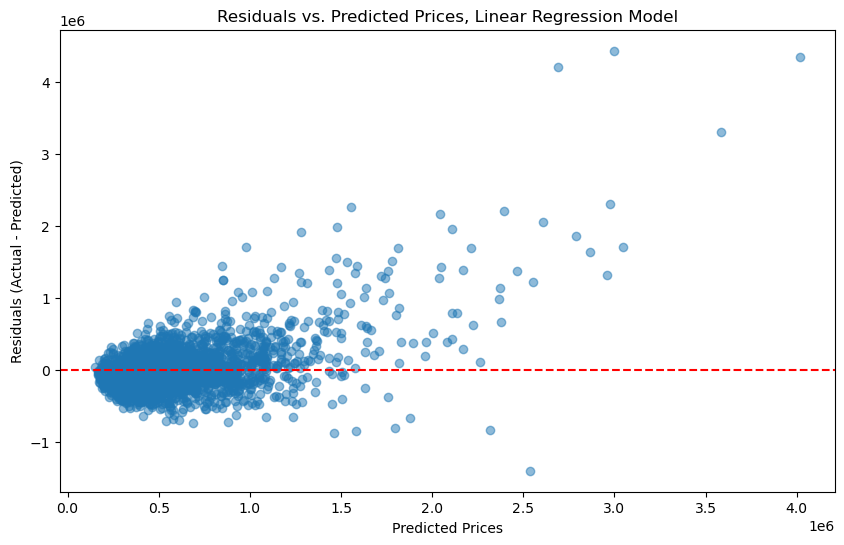

In [29]:
#Not as good. To be expected - the KNN model is more sophisticated. That being said, the shape of the prediction might
#be better. Let's show the same graphs next to each other for comparison.

#Old model:
#Calculate residuals
residuals = y_test - y_pred

#Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  #Reference line for zero error
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs. Predicted Prices, KNN Model')
plt.show()

#Linear regression
#Calculate residuals
residuals = y_test - y_pred_linear

#Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  #Reference line for zero error
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs. Predicted Prices, Linear Regression Model')
plt.show()

In [54]:
#It's close / hard to tell, but I still think the KNN model is superior. Note how the outliers in the linear regression
#model have fewer below the red line. This implies that the linear regression errors "lean" more towards one side at the
#higher predicted values.

In [30]:
#Problem 7: Use cross validation to assess the model.

#Using the entire dataset since cross_val_score will handle train/test splitting internally
X_full = df[['sqft_living']]
y_full = df['price']

knn_regressor = KNeighborsRegressor(n_neighbors=4)

#Calculate R^2 for each fold (cross_val_score default for regression models is R^2)
r2_scores = cross_val_score(knn_regressor, X_full, y_full, cv=5)

print(f"R^2 scores for each fold: {r2_scores}")
print(f"Average R^2 score: {r2_scores.mean()}")
print(f"Standard Deviation of R^2 scores: {r2_scores.std()}")

#Calculate mean average errors
neg_mae_scores = cross_val_score(knn_regressor, X_full, y_full, cv=5, 
                                 scoring=make_scorer(mean_absolute_error, greater_is_better=False))

mae_scores = -neg_mae_scores

print(f"MAE scores for each fold: {mae_scores}")
print(f"Average MAE score: {mae_scores.mean()}")
print(f"Standard Deviation of MAE scores: {mae_scores.std()}")

R^2 scores for each fold: [0.4618724  0.4820092  0.38968011 0.40008628 0.40030136]
Average R^2 score: 0.4267898683090004
Standard Deviation of R^2 scores: 0.03760801766996719
MAE scores for each fold: [189712.77920426 180993.09941013 178109.6123641  185889.03233457
 189074.73958815]
Average MAE score: 184755.85258024166
Standard Deviation of MAE scores: 4535.169750481958


In [57]:
#It looks likes there isn't too much spread in the R^2 value for the folds. It also looks like the mean average errors are
#about 80,000 higher than the KNN model. I think we can conclude the KNN model is superior than the folds.

In [59]:
#ChatGPT didn't prompt me to test the model's accuracy. For the last question, I'm going to test some of the functions we
#learned in Scikit-learn: Modeling Process module and apply them to my KNN model. To do this, I'm going to try to predict
#if the property is waterfront or not based on the other variables.
#Problem 8: Loop through different values of K to predict if the property is waterfront or not.
#Optimize the value based on accuracy and recall. Plot accuracy and recall versus K.

In [31]:
#Re-establish KNN model, only this time we're predicting if its waterfront, not price.

X = df.drop('waterfront', axis=1)  #Using all columns except 'waterfront' as features
y = df['waterfront']  #Binary target variable

# Drop the original 'date' column
if 'date' in df.columns:
    df = df.drop('date', axis=1)

X = df.drop('waterfront', axis=1)  # Using all columns except 'waterfront' as features
y = df['waterfront']  # Binary target variable

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Establishing range of K values
k_values = list(range(1, 31))

#Define results
accuracies = []
recalls = []

#Loop through the values of K
for k in k_values:
    #Run KNN with the current k value
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_scaled, y_train)
    y_pred = knn_classifier.predict(X_test_scaled)
    
    #Compute accuracy and recall for the current k value
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    #Store the metrics
    accuracies.append(accuracy)
    recalls.append(recall)

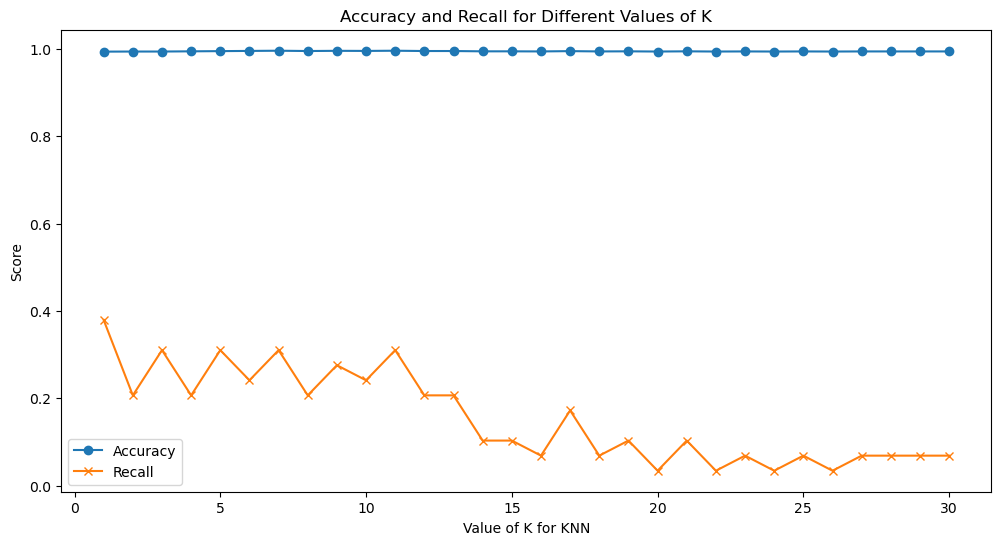

In [32]:
#Plot our metrics

plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, marker='o', label='Accuracy')
plt.plot(k_values, recalls, marker='x', label='Recall')
plt.xlabel('Value of K for KNN')
plt.ylabel('Score')
plt.title('Accuracy and Recall for Different Values of K')
plt.legend()
plt.show()

In [33]:
#Looks like the recall for the watefront prediction is optimized at K=1.
#However, I find the accuracy at 1.0 for all values highly suspicious.
#Let's investigate
#Were there any variables that had high correlation?
correlations = df.corr()['waterfront'].sort_values()
print(correlations)

long            -0.041910
yr_built        -0.026161
lat             -0.014274
bedrooms        -0.006582
weekday         -0.004668
year            -0.004165
id              -0.002721
month            0.008132
day              0.010518
condition        0.016653
sqft_lot         0.021604
floors           0.023698
zipcode          0.030285
sqft_lot15       0.030703
bathrooms        0.063744
sqft_above       0.072075
sqft_basement    0.080588
grade            0.082775
sqft_living15    0.086463
yr_renovated     0.092885
sqft_living      0.103818
price            0.266369
view             0.401857
waterfront       1.000000
Name: waterfront, dtype: float64


In [34]:
#None of them had super high correlations so it's not like there was some sort of 1:1 relationship with another variable.
#What percentage of the houses were waterfront?

#What portion of the observations are waterfront?
print(df['waterfront'].value_counts(normalize=True))

0    0.992458
1    0.007542
Name: waterfront, dtype: float64


In [35]:
#Ahh, that's the issue. Waterfront houses are such a tiny fraction of the total houses that it appears as 1.0 on the chart.